In [1]:
#elongation vs force (N)
import pandas as pd
df=pd.read_csv('AmyKevlar_2w_70C_00RH.csv')

In [2]:
df

,Tests,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,Mean
0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000
1,0.010000,0.00130,0.00135,0.00144,0.00130,0.00112,0.00131,0.000434,0.00128,0.00125,...,0.00106,0.00106,0.00131,0.00112,0.00120,0.00136,0.00142,0.000598,0.00128,0.001181
2,0.020000,0.00230,0.00234,0.00236,0.00211,0.00192,0.00228,0.001050,0.00227,0.00237,...,0.00184,0.00187,0.00223,0.00188,0.00217,0.00215,0.00227,0.000996,0.00206,0.002047
3,0.030000,0.00312,0.00329,0.00333,0.00300,0.00267,0.00320,0.001910,0.00330,0.00328,...,0.00259,0.00270,0.00320,0.00265,0.00317,0.00294,0.00316,0.001590,0.00289,0.002925
4,0.040000,0.00399,0.00444,0.00449,0.00406,0.00345,0.00426,0.002910,0.00441,0.00435,...,0.00354,0.00371,0.00430,0.00350,0.00433,0.00381,0.00422,0.002310,0.00385,0.003936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3.909997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813618
392,3.919997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815604
393,3.929997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817642
394,3.939997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817567


Text(0, 0.5, 'Force (N)')

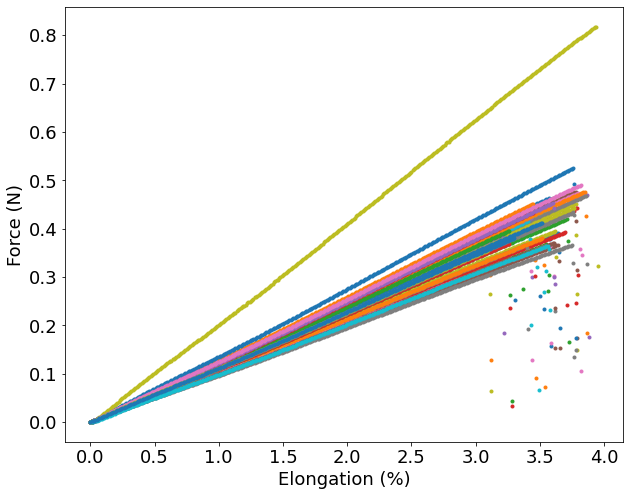

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
import matplotlib.pyplot as plt
for i in range(1,52):
    plt.plot(df['Tests'],df[str(i)],'.',label=str(i))
    #plt.legend()
plt.xlabel('Elongation (%)')
plt.ylabel('Force (N)')

Text(0, 0.5, 'Force (N)')

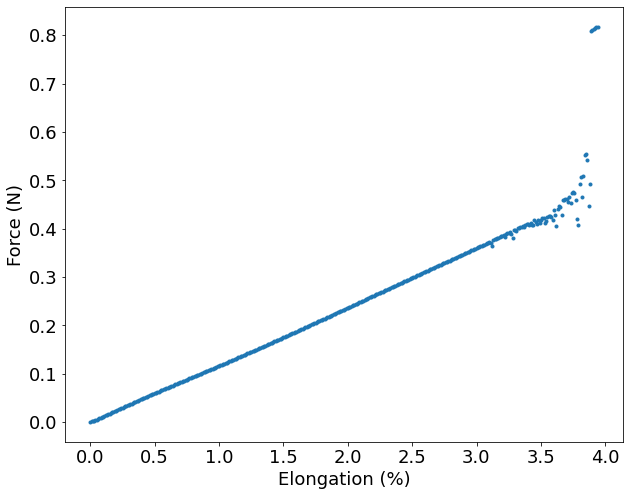

In [4]:
from jarvis.core.spectrum import Spectrum
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
import matplotlib.pyplot as plt
#Take two columns only
df_ground_truth = df[['Tests','Mean']].dropna()
#Check interpolation works for ground truth data

elongation = df_ground_truth['Tests']
s = Spectrum(x=df_ground_truth['Tests'],y=df_ground_truth['Mean'])
y_data = s.get_interpolated_values(new_dist=elongation)
plt.plot(elongation, y_data,'.')
#The line below shows the interpolation reproduces the data
#plt.plot(df['Tests'],df['Mean'],'.')
plt.xlabel('Elongation (%)')
plt.ylabel('Force (N)')

In [5]:
y=[]
for i in range(1,52):
    #print (i)
    exp_df = df[['Tests',str(i)]].dropna()
    s = Spectrum(x=exp_df['Tests'],y=exp_df[str(i)])
    y_data = s.get_interpolated_values(new_dist=elongation)
    y.append(y_data)

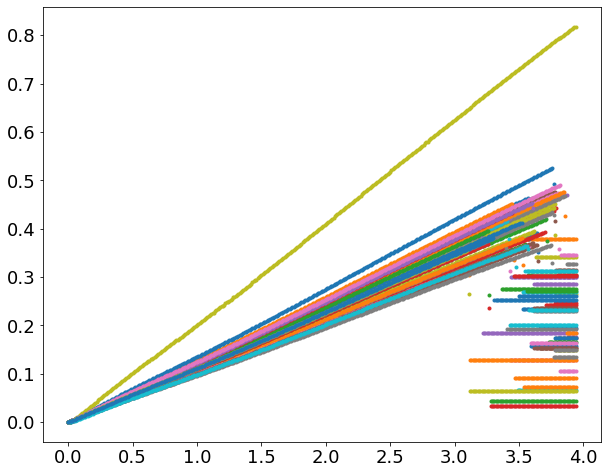

In [6]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
import matplotlib.pyplot as plt
for ii,i in enumerate(y):
    plt.plot(elongation,i,'.',label=str(ii))
    #plt.legend()

In [7]:
from jarvis.db.jsonutils import dumpjson
m={}
train={}
test={}
test['kevlar129']=';'.join(map(str,df_ground_truth['Mean'].values))
m['train']=train
m['test']=test
dumpjson(data=m,filename='midas_stress_strain_vibroscopy_kevlar129.json')

In [13]:
import os


cwd=os.getcwd()
#Taking 5 measurements for now
for ii,i in enumerate(y):
    if ii<5:
        folder_name = '../favimat_'+str(ii+1)
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
            
        os.chdir(folder_name)
        fname='EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv'
        f=open(fname,'w')
        line='id,prediction\n'
        f.write(line)
        line='kevlar129,'+';'.join(map(str,i))
        f.write(line)
        f.close()
        cmd = 'zip '+fname+'.zip '+fname
        os.system(cmd)
        cmd = 'rm '+fname
        os.system(cmd)
        os.chdir(cwd)
        
    

updating: EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv (deflated 62%)
updating: EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv (deflated 63%)
updating: EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv (deflated 63%)
updating: EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv (deflated 60%)
updating: EXP-Spectra-stress_strain_vibroscopy_kevlar129-midas-test-multimae.csv (deflated 59%)


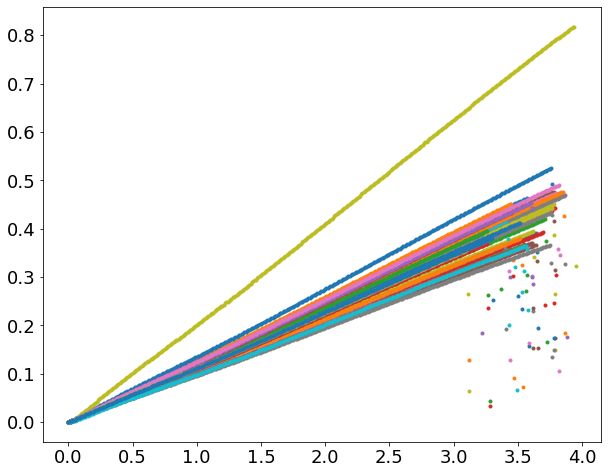

In [9]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
import matplotlib.pyplot as plt
for i in range(1,52):
    plt.plot(df['Tests'],df[str(i)],'.',label=str(ii))
    #plt.legend()